<a href="https://colab.research.google.com/github/anandvimal/deeplearning-experiments/blob/master/cifar_10v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 1.2 on CIFAR-10 dataset

we will use ImageDataGenerator in keras to generate new images by agumenting training data
this way we will get more data to train on and our accuracy should increase. 

to learn more about image augmentation i found this post helpful:

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/



In [0]:
https://machinelearningmastery.com/image-augmentation-deep-learning-keras/from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#cifar-10 is a set of 60k images each of 32*32 pixels on 3 channels(rgb)
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [0]:
#constatnts
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#load dataset
(X_train, y_train), (X_test, y_test) =cifar10.load_data()
print('X_train shape: ',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0], 'test samples')

X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# one hot encoding of labels
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
#Normalization of labels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [0]:
# network/model
model = Sequential()

#starting with conv2d and maxpooling
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#flatten the model and use dense layers with dropout
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [0]:
#train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)


Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 237s 6ms/step - loss: 1.8124 - acc: 0.3504 - val_loss: 1.4350 - val_acc: 0.4817
Epoch 2/20
40000/40000 [==============================] - 234s 6ms/step - loss: 1.3386 - acc: 0.5224 - val_loss: 1.3071 - val_acc: 0.5352
Epoch 3/20
40000/40000 [==============================] - 234s 6ms/step - loss: 1.1282 - acc: 0.6039 - val_loss: 1.1976 - val_acc: 0.5729
Epoch 4/20
40000/40000 [==============================] - 234s 6ms/step - loss: 0.9880 - acc: 0.6528 - val_loss: 0.9338 - val_acc: 0.6708
Epoch 5/20
40000/40000 [==============================] - 235s 6ms/step - loss: 0.8867 - acc: 0.6904 - val_loss: 0.8382 - val_acc: 0.7089
Epoch 6/20
40000/40000 [==============================] - 235s 6ms/step - loss: 0.8147 - acc: 0.7160 - val_loss: 0.7521 - val_acc: 0.7440
Epoch 7/20
40000/40000 [==============================] - 235s 6ms/step - 

In [0]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print('Test score/loss: ',score[0])
print('Test accuracy: ',score[1])


10000/10000 [==============================] - 15s 2ms/step
Test score/loss:  0.6833030158996583
Test accuracy:  0.7826


In [0]:
#list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


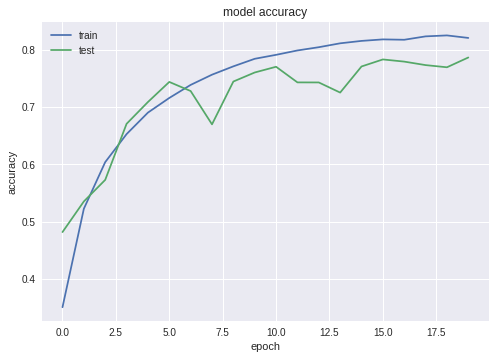

In [0]:
#plot for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

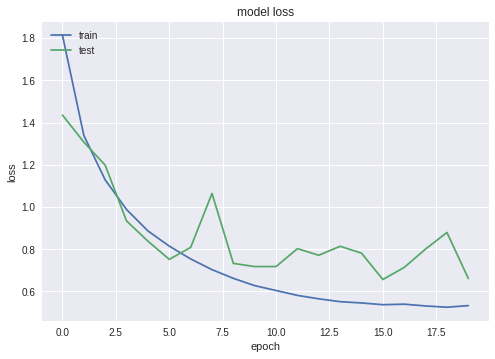

In [0]:
#plot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [0]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json','w').write(model_json)
#and the weights learned by our deep netowrk on the training set
model.save_weights('cifar10_weights.h5', overwrite=True)